In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
path = "/mnt/c/Users/olivi/OneDrive - Amherst College/6 Summer 2025/surface-detection/logs/kfold/clean"

In [1]:
path = "/mnt/c/Users/olivi/OneDrive - Amherst College/6 Summer 2025/surface-detection/logs/scratch/clean"

##### Average accuracy

In [ ]:
def avg_accuracy(model, channels, group, data):
    if data:
        arr = np.loadtxt(f"{path}/{group}/{model}.txt", delimiter=",")
    else:
        arr = np.loadtxt(f"{path}/{group}/{model}_k10_{channels}zscore50.txt", delimiter=",")
    return np.mean(arr)

In [ ]:
model = "exlstm60"
channels = "6" 
group = 1

avg_accuracy(model, channels, group)

In [ ]:
def avg_accuracy(group, name):
    arr = np.loadtxt(f"{path}/{group}/scratch_{group}_acc_{name}.txt")
    return np.mean(arr)

##### Scatterplot: accuracy vs. learnable parameters / avg training time

In [ ]:
def scatterplot(x, xlabel, models, channels, group, data):
    accuracy = [0 for i in range(len(models))]
    for i, model in enumerate(models):
        accuracy[i] = avg_accuracy(model, channels, group, data)

    plt.scatter(x, accuracy, marker='x')
    # plt.axhline(0.815, linestyle="--")
    plt.xlabel(xlabel)
    # plt.xscale("log")
    plt.ylabel("Average Accuracy")
    plt.title("Accuracy vs. Complexity")
    for i, txt in enumerate(models):
        plt.annotate(txt, (x[i], accuracy[i]))
    plt.show()

In [ ]:
# group = 1
# models = ["excnn", "resnet1", "resnet2", "alexnet", "vggnet", "attention", "exlstm60"]
# params = [11173, 26933, 26933, 540437, 22176133, 19365, 30845] # 2 channels
# time = [0, 30.18638, 24.76924, 20.2037, 254.3841, 44.4685, 146.5882]
# params = [11813, 27125, 27125, 573253, 22176645, 19557, 32765] # 6 channels
# time = [0, 29.64571, 26.32817, 20.40423, 244.4325, 34.29429, 162.5065]

# group = 2
# models = ["exlstm60", "bilstm", "twobilstm", "attbilstm", "hybrid"]
# params = [30845, 67865, 66785, 59945, 76709]
# time = [0, 224.146, 223.722, 178.658, 187.826]

# group = "ppt1"
# models = ["maya", "resnet1", "bilstm", "hybrid"]
# params = [151429, 26933, 67865, 76709]
# time = [43.0784, 30.1864, 224.146, 187.826]

# group = "augment2"
# models = ["none", "oversample", "noise", "scale", "magwarp", "timewarp"]
# time = [59.35284, 96.93538, 97.3456, 96.54792, 95.83762, 94.22566]

group = "augment6"
models = ["sequence", "image", "stacked"]
time = [62.4998, 90.22104, 90.10304]

# scatterplot(params, "Number of Learnable Parameters", models, "", group)
scatterplot(time, "Average Training Time (10 Folds)", models, "", group, True)

In [ ]:
names = ["50x4x1", "50x6x1", "50x8x1", "50x10x1"]
times = [537.31044, 714.66502, 959.55944, 1069.67648]
accs = [0.8181, 0.8031, 0.8011, 0.7861]

In [ ]:
names = ["50x2", "50x4x1", "50x4 80%", "50x4 norm", "50x2 norm"]
times = [28.15224, 63.41498, 140.99172, 63.18286, 27.37416]
accs = [0.8223, 0.8181, 0.8251, 0.9009, 0.8851]

In [ ]:
plt.scatter(times, accs, marker='x')
plt.axhline(0.815, linestyle="--")
plt.xlabel("Average Time (Training + Testing)")
plt.ylabel("Average Accuracy")
for i, txt in enumerate(names):
    plt.annotate(txt, (times[i], accs[i]))
plt.show()

##### Violin plot 1: accuracy vs. user

In [ ]:
model = "excnn"
channels = "" 

In [ ]:
data = np.loadtxt(f"{path}{group}/{model}_k10_{channels}zscore50.txt", delimiter=",")
data = data.T
plt.violinplot(data, showmeans=True)
plt.title(f"Accuracy by User ({model.capitalize()})")
plt.xlabel("User")
plt.ylabel("Accuracy")
plt.show()

##### Violin plot 2: accuracy (average over user) vs. data

In [ ]:
filenames = ["augment2/none_05", "augment2/oversample_05", "augment6/stacked"]
# one column per filename
# one row per fold (data: average over users)
arr = np.zeros((len(filenames), 10))
for i, file in enumerate(filenames):
    dat = np.loadtxt(f"{path}/{file}.txt", delimiter=",")
    arr[i] = np.mean(dat, axis=0)
plt.violinplot(arr.T, showmeans=True)
plt.xlabel("Composed, Oversampled, Stacked")
plt.ylabel("Accuracy")
plt.show()

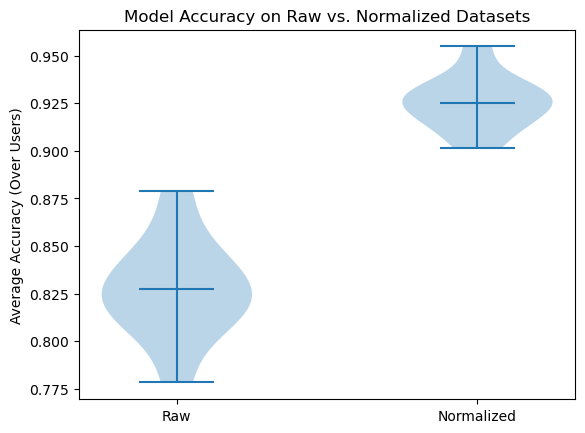

In [15]:
file = "maya/maya2d_acc_ver2"
raw = np.loadtxt(f"{path}/{file}_raw.txt", delimiter=",")
norm = np.loadtxt(f"{path}/{file}.txt", delimiter=",")

arr = np.zeros((2, 10))
arr[0] = np.mean(raw, axis=0)
arr[1] = np.mean(norm, axis=0)

plt.violinplot(arr.T, showmeans=True)
plt.ylabel("Average Accuracy (Over Users)")
plt.xticks([1,2], ["Raw", "Normalized"])
plt.title("Model Accuracy on Raw vs. Normalized Datasets")
plt.show()

##### Line plot 1: accuracy vs. user

In [ ]:
# models = ["excnn", "resnet1", "resnet2", "alexnet", "vggnet", "attention", "exlstm60"]
# channels = "6" 
# group = 1

# models = ["exlstm60", "bilstm", "twobilstm", "attbilstm", "hybrid"]
# channels = ""
# group = 2

group = "ppt1"
channels = ""
models = ["maya", "resnet1", "bilstm", "hybrid"]

In [ ]:
plt.figure(figsize=(6,8))
x = [i for i in range(1, 6)]
for mod in models:
    data = np.loadtxt(f"{path}/{group}/{mod}_k10_{channels}zscore50.txt", delimiter=",")
    y = np.mean(data, axis=1)
    ye = np.std(data, axis=1)

    plt.plot(x, y, label=mod)
    plt.fill_between(x, y-ye, y+ye, alpha=0.1)

plt.xticks(x)
plt.xlabel("User")
plt.ylabel("Accuracy")
plt.title("Accuracy by User")
plt.legend()
plt.show()

In [ ]:
labels = ["50x2", "50x4x1", "50x2 norm", "50x4x1 norm"]
paths = ["stacks", "stacks", "norm", "norm"]
names = ["50x2", "50x4x1", "50x2", "sample"]

In [ ]:
plt.figure(figsize=(6,8))
x = [i for i in range(1, 11)]
for i, name in enumerate(names):
    data = np.loadtxt(f"{path}/{paths[i]}/scratch_{paths[i]}_acc_{name}.txt", delimiter=",")
    y = np.mean(data, axis=0)
    ye = np.std(data, axis=0)

    plt.plot(x, y, label=labels[i])
    plt.fill_between(x, y-ye, y+ye, alpha=0.2)

plt.axhline(0.815, linestyle="--", color="black")
plt.xticks(x)
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.title("Accuracy by Fold")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(6,8))
x = [i for i in range(1,6)]
for i, name in enumerate(names):
    data = np.loadtxt(f"{path}/{paths[i]}/scratch_{paths[i]}_acc_{name}.txt", delimiter=",")
    y = np.mean(data, axis=1)
    ye = np.std(data, axis=1)
    plt.plot(x, y, label=labels[i])
    plt.fill_between(x, y-ye, y+ye, alpha=0.1)

plt.xticks(x)
plt.xlabel("User")
plt.ylabel("Accuracy")
plt.title("Accuracy by User")
plt.legend()
plt.show()

##### Line plot 2: accuracy vs. fold

In [ ]:
# models = ["excnn", "resnet1", "resnet2", "alexnet", "vggnet", "attention", "exlstm60"]
# channels = "6" 
# group = 1

# models = ["exlstm60", "bilstm", "twobilstm", "attbilstm", "hybrid"]
# channels = ""
# group = 2

group = "ppt1"
channels = ""
models = ["maya", "resnet1", "bilstm", "hybrid"]

In [ ]:
plt.figure(figsize=(6,8))
x = [i for i in range(1, 11)]
for mod in models:
    data = np.loadtxt(f"{path}/{group}/{mod}_k10_{channels}zscore50.txt", delimiter=",")
    y = np.mean(data, axis=0)
    ye = np.std(data, axis=0)

    plt.plot(x, y, label=mod)
    plt.fill_between(x, y-ye, y+ye, alpha=0.2)

plt.xticks(x)
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.title("Accuracy by Fold")
plt.legend()
plt.show()

##### Confusion

In [5]:
import pandas as pd
import sklearn
name = "scratch_weights_testpreds_best"

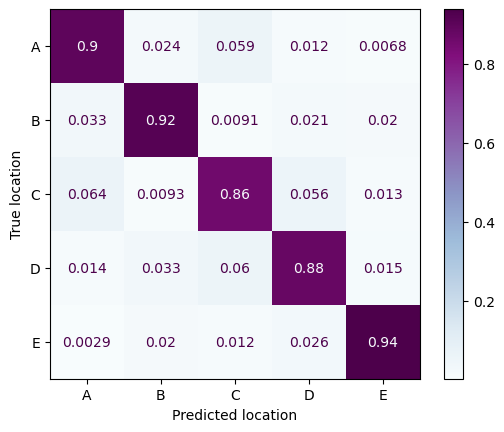

In [6]:
test = pd.read_csv(f"{path}/{name}.txt", header=None)
sklearn.metrics.ConfusionMatrixDisplay.from_predictions(test[0], test[1], cmap='BuPu', display_labels=['A', 'B', 'C', 'D', 'E'], normalize='true')
plt.xlabel("Predicted location")
plt.ylabel("True location")
plt.show()

##### Class Weightings

In [ ]:
import pandas as pd
import sklearn
name = "scratch_norm_testpreds_sample"

In [ ]:
test = pd.read_csv(f"{path}/{name}.txt", header=None)
cm = sklearn.metrics.confusion_matrix(test[0], test[1])

tp = np.diag(cm) # true positives
n = cm.sum(axis=1) # samples per class
error = 1 - (tp / n) # error per class

weights = error / error.sum()
weights = weights * len(weights)

w1, w2, w3, w4, w5 = weights
print(f"[{w1:.4f}, {w2:.4f}, {w3:.4f}, {w4:.4f}, {w5:.4f}]")